<a href="https://colab.research.google.com/github/renatampr/https-github.com-renatampr-topicos_contemporaneos--CESAR-EAD-2024/blob/main/C%C3%B3pia_de_RENATA_02_Basic_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtros de Imagem

Filtros de imagem são ferramentas essenciais em visão computacional e processamento de imagens. Eles são usados para várias finalidades, como realçar características, reduzir ruídos, detectar bordas, etc.

Filtros aplicam uma operação matemática sobre um grupo de pixels (vizinhança) em uma imagem para produzir um novo valor de pixel. Eles são geralmente representados por matrizes chamadas "kernels".

## Operação de Convolução
A convolução é uma operação matemática utilizada para aplicar filtros a uma imagem. A operação de convolução envolve passar o kernel sobre a imagem, calculando a soma ponderada dos pixels cobertos pelo kernel.

A operação de convolução pode ser descrita da seguinte maneira:
1. Posicione o kernel sobre a imagem de modo que o centro do kernel esteja alinhado com um pixel específico.
2. Multiplique cada valor no kernel pelo valor do pixel correspondente na imagem.
3. Some todos os produtos obtidos no passo anterior.
4. O valor resultante é atribuído ao pixel central na imagem de saída.
5. Repita o processo para cada pixel na imagem.

Matematicamente, a convolução para uma imagem $I$ e um kernel $K$ pode ser descrita como:

$(I * K)(i, j) = \sum_{m} \sum_{n} I(i+m, j+n) \cdot K(m, n)$

onde $i$ e $j$ são as coordenadas do pixel na imagem de saída, e $m$ e $n$ são os índices dos elementos do kernel.

### Exemplo de Kernel
Um kernel 3x3 para suavização (média) pode ser representado da seguinte forma:

$K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

### Aplicando Filtros

Vamos implementar uma função chamada `apply_filter` que recebe uma imagem e um kernel, e aplica o filtro na imagem utilizando convolução.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Definindo uma função auxiliar para exibir imagens
def show_image(img, title='Image', cmap_type='gray', figsize=(4, 4), vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap_type, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Caso a pasta 'data' não exista, crie-a e faça o download da imagem
import os

os.makedirs('data', exist_ok=True)
!curl -o data/mari.png /content/sample_data/mari-ballet.jpeg

curl: (3) URL using bad/illegal format or missing URL


In [ ]:
def apply_filter(image, kernel):
    # Obtendo as dimensões da imagem e do kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculando as bordas para o padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Aplicando padding na imagem
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Inicializando a imagem filtrada
    filtered_image = np.zeros_like(image)

    # Aplicando a convolução
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            filtered_value = np.sum(region * kernel)
            filtered_image[i, j] = np.clip(filtered_value, 0, 255)

    return filtered_image

### Filtro de Suavização (Blur)

Um kernel 3x3 para suavização (média) pode ser representado da seguinte forma:

$K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

Vamos aplicar um filtro de suavização utilizando um kernel 3x3 para calcular a média dos pixels vizinhos.

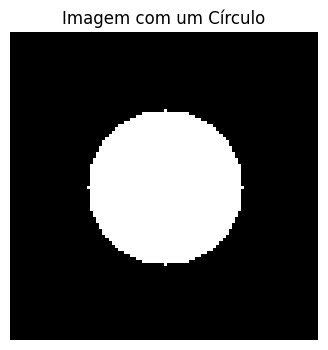

In [ ]:
circle_image = np.zeros((100, 100), dtype=np.uint8)
center = (50, 50)
radius = 25

for y in range(100):
    for x in range(100):
        dist = (x - center[0])**2 + (y - center[1])**2
        if dist <= radius**2:
            circle_image[y, x] = 255

show_image(circle_image, title='Imagem com um Círculo')

Kernel de Suavização (Blur):
[[0.111 0.111 0.111]
 [0.111 0.111 0.111]
 [0.111 0.111 0.111]]


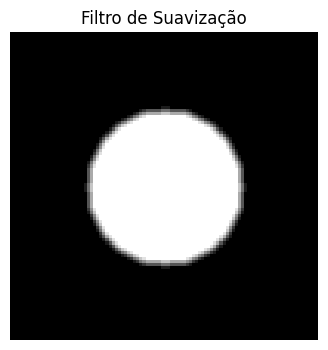

In [ ]:
blur_kernel = np.ones((3, 3)) / 9

np.set_printoptions(precision=3, suppress=True)

print("Kernel de Suavização (Blur):")
print(blur_kernel)

blurred_circle = apply_filter(circle_image, blur_kernel)

show_image(blurred_circle, title='Filtro de Suavização')

### Filtro de Detecção de Bordas (Sobel)

O filtro de Sobel é utilizado para detecção de bordas em imagens, destacando mudanças abruptas de intensidade. Existem dois tipos principais de filtros de Sobel: o filtro horizontal e o filtro vertical.

Um kernel Sobel para detecção de bordas horizontais $K_x$ pode ser representado da seguinte forma:

$K_x = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{bmatrix}$

Para detecção de bordas verticais $K_y$, o kernel Sobel é:

$K_y = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}$

Vamos aplicar os filtros Sobel para detectar bordas horizontais e verticais na imagem Lenna.

[[[ 44  26  33]
  [ 44  26  33]
  [ 44  26  33]
  ...
  [ 16  13  15]
  [ 15  12  14]
  [ 15  12  14]]

 [[ 44  26  33]
  [ 44  26  33]
  [ 44  26  33]
  ...
  [ 16  13  15]
  [ 15  12  14]
  [ 15  12  14]]

 [[ 44  26  33]
  [ 44  26  33]
  [ 44  26  33]
  ...
  [ 16  13  15]
  [ 15  12  14]
  [ 15  12  14]]

 ...

 [[255 173 239]
  [255 172 238]
  [255 171 237]
  ...
  [255 184 228]
  [255 184 227]
  [255 183 227]]

 [[255 170 236]
  [255 170 236]
  [255 169 235]
  ...
  [255 186 228]
  [255 187 228]
  [255 185 228]]

 [[255 168 234]
  [255 168 234]
  [254 167 233]
  ...
  [255 187 228]
  [255 187 228]
  [255 185 228]]]


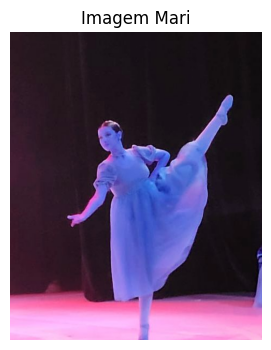

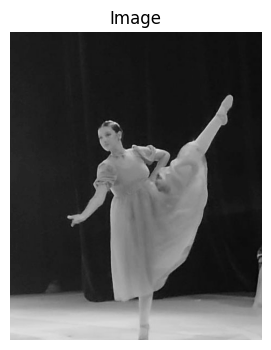

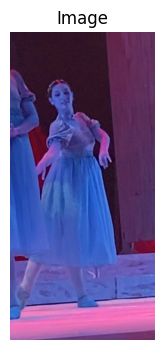

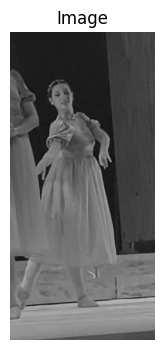

In [ ]:
mari = cv2.imread('/content/sample_data/mari-ballet.jpeg')
mari2 = cv2.imread('/content/sample_data/mari2.jpeg')
mari_gray = cv2.cvtColor(mari, cv2.COLOR_BGR2GRAY)
mari_gray2 = cv2.cvtColor(mari2, cv2.COLOR_BGR2GRAY)
print(mari)
show_image(mari, title='Imagem Mari')
show_image(mari_gray)
show_image(mari2)
show_image(mari_gray2)

Kernel Sobel para detecção de bordas horizontais (Sobel X):
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


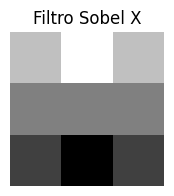

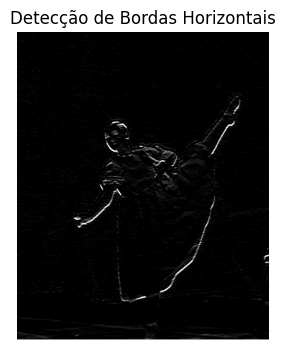

In [ ]:
sobel_x_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

print("Kernel Sobel para detecção de bordas horizontais (Sobel X):")
print(sobel_x_kernel)

sobel_x_lenna = apply_filter(mari_gray, sobel_x_kernel)

show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_lenna, title='Detecção de Bordas Horizontais')

Kernel Sobel para detecção de bordas verticais (Sobel Y):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


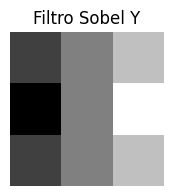

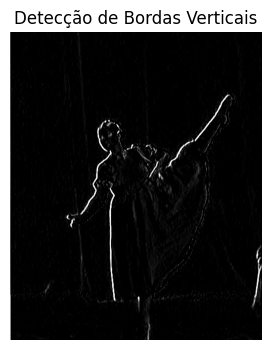

In [ ]:
sobel_y_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print("Kernel Sobel para detecção de bordas verticais (Sobel Y):")
print(sobel_y_kernel)

sobel_y_lenna = apply_filter(mari_gray, sobel_y_kernel)

show_image(sobel_y_kernel, title='Filtro Sobel Y', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_y_lenna, title='Detecção de Bordas Verticais')

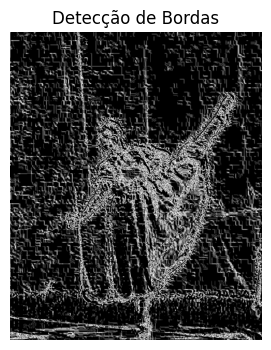

In [ ]:
# Calculando a magnitude do gradiente
sobel_mari = np.sqrt(sobel_x_lenna**2 + sobel_y_lenna**2)
sobel_mari = (sobel_mari / sobel_mari.max()) * 255
sobel_mari = sobel_mari.astype(np.uint8)

show_image(sobel_mari, title='Detecção de Bordas')

#### Direção do Gradiente (Quiver)
Vamos visualizar a direção do gradiente utilizando um gráfico de vetores (quiver). Isso nos ajudará a entender a orientação das bordas detectadas pelo filtro Sobel.

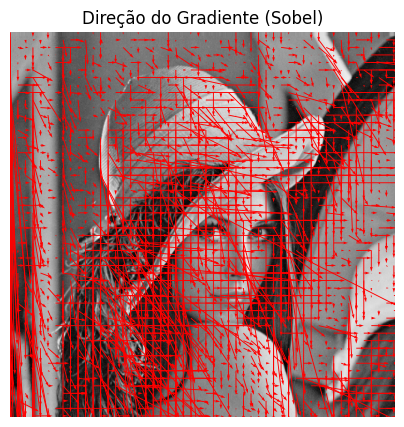

In [ ]:
direction = np.arctan2(sobel_y_lenna, sobel_x_lenna)

# Plotar os vetores de gradiente
step = 10

plt.figure(figsize=(5, 5))
plt.imshow(lenna_gray, cmap='gray')

y, x = np.mgrid[0:lenna_gray.shape[0]:step, 0:lenna_gray.shape[1]:step]
u = sobel_x_lenna[::step, ::step]
v = sobel_y_lenna[::step, ::step]

plt.quiver(x, y, u, v, color='red', angles='xy', scale_units='xy', scale=1, minlength=0.1)

plt.title('Direção do Gradiente (Sobel)')
plt.axis('off')
plt.show()

## Exercícios
Agora é sua vez!

### Exercício 1

O filtro de realce (sharpen) é utilizado para aumentar a nitidez de uma imagem, destacando bordas e detalhes finos. A lógica por trás do kernel de realce envolve a aplicação de valores negativos aos pixels vizinhos e um valor positivo central elevado, o que enfatiza as transições de intensidade. Um exemplo de kernel de realce é:

$K_{sharpen} = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}$

Já o filtro de relevo (emboss) cria um efeito de relevo na imagem, fazendo com que pareça que a imagem está em alto-relevo. A lógica por trás do kernel de emboss é utilizar uma combinação de valores negativos e positivos, que simula sombras e realces. Um exemplo de kernel de emboss é:

$K_{emboss} = \begin{bmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 \\
\end{bmatrix}$

1. Aplique o filtro de realce (sharpen) à imagem Lenna e observe como ele aumenta a nitidez da imagem.
2. Aplique o filtro de relevo (emboss) à imagem Lenna e observe o efeito de relevo criado.
3. Plote as imagens resultantes após a aplicação de cada filtro.

(574, 469, 3)
/content/sample_data/mari-ballet.jpeg


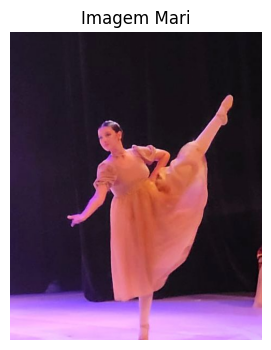

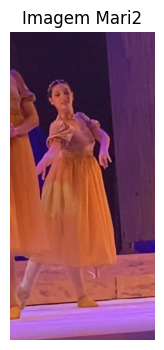

In [ ]:
# Localização da imagem
mari = "/content/sample_data/mari-ballet.jpeg"
mari2 = "/content/sample_data/mari2.jpeg"
# Download da imagem original
#mari = cv2.imread('/content/sample_data/mari-ballet.jpeg')
# Download da imagem original
img_bytes = mari
img_data = Image.open(img_bytes)
img_color_array = np.array(img_data)

img_data2 = Image.open(mari2)
img_color_array2 = np.array(img_data2)

print(img_color_array.shape)
print(mari)
show_image(img_data, title='Imagem Mari')
show_image(img_data2, title='Imagem Mari2')

Kernel shrpen (Sobel X):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


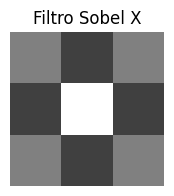

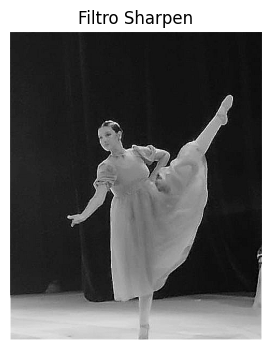

In [ ]:
#1
sobel_x_kernel = np.array([[0, -1, 0],[ -1, 5, -1], [0, -1, 0]])

print("Kernel shrpen (Sobel X):")
print(sobel_x_kernel)

sobel_x_lenna = apply_filter(mari_gray, sobel_x_kernel)

show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_lenna, title='Filtro Sharpen')

Kernel shrpen (Sobel X):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


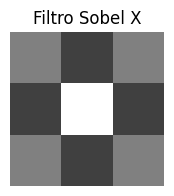

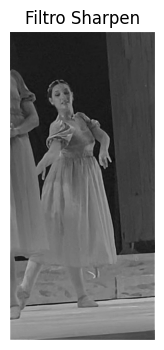

In [ ]:
obel_x_kernel = np.array([[0, -1, 0],[ -1, 5, -1], [0, -1, 0]])

print("Kernel shrpen (Sobel X):")
print(sobel_x_kernel)

sobel_x_lenna = apply_filter(mari_gray2, sobel_x_kernel)

show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_lenna, title='Filtro Sharpen')

In [ ]:
import requests
import io
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
# Função para download de imagem
def download_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        return io.BytesIO(response.content)
    else:
        raise Exception("Falha ao baixar a imagem")

Kernel Sharpen (Sobel X):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


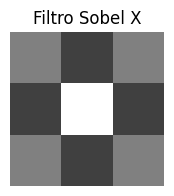

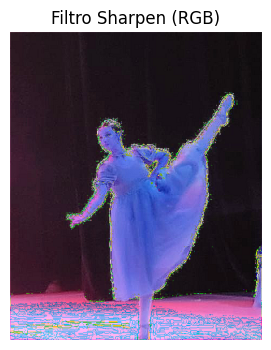

In [ ]:
from scipy.signal import convolve2d

# Função de aplicação de filtro ajustada
def apply_filter(image, kernel):
    # Se a imagem for RGB, processe cada canal separadamente
    if len(image.shape) == 3:
        filtered_image = np.zeros_like(image)
        for c in range(image.shape[2]):  # Itera pelos canais
            filtered_image[:, :, c] = convolve2d(image[:, :, c], kernel, mode='same', boundary='fill', fillvalue=0)
        return filtered_image
    else:  # Imagem em escala de cinza
        return convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

# Kernel Sobel X
sobel_x_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
print("Kernel Sharpen (Sobel X):")
print(sobel_x_kernel)

# Aplicando o filtro na imagem RGB
sobel_x_mari = apply_filter(mari, sobel_x_kernel)

# Mostrando imagens
show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_mari, title='Filtro Sharpen (RGB)')

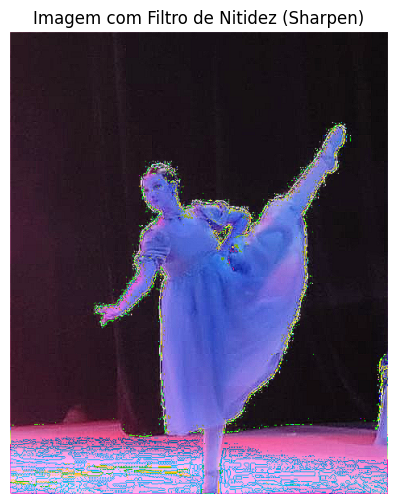

In [ ]:
blur_kernel = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]]) / 9

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Função para aplicar um filtro em imagens RGB
def apply_filter_rgb(image, kernel):
    if len(image.shape) == 3:  # Verifica se a imagem é RGB
        filtered_image = np.zeros_like(image)
        for c in range(image.shape[2]):  # Itera pelos três canais
            filtered_image[:, :, c] = convolve2d(
                image[:, :, c], kernel, mode='same', boundary='fill', fillvalue=0
            )
        return np.clip(filtered_image, 0, 255).astype(np.uint8)
    else:  # Imagem em escala de cinza
        return np.clip(convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0), 0, 255).astype(np.uint8)

# Função para exibir imagens
def show_image(image, title='', figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

  # Aplicando filtro de nitidez
filtered_image = apply_filter_rgb(mari, sharpen_kernel)

# Mostrando resultados
show_image(filtered_image, title='Imagem com Filtro de Nitidez (Sharpen)')

(574, 469, 3)
/content/sample_data/mari-ballet.jpeg


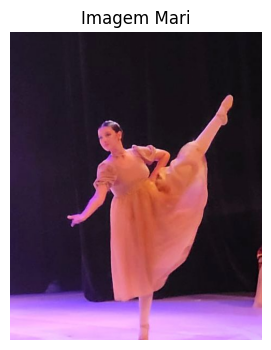

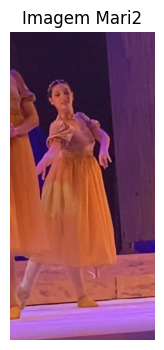

In [ ]:
# Localização da imagem
mari = "/content/sample_data/mari-ballet.jpeg"
mari2 = "/content/sample_data/mari2.jpeg"
# Download da imagem original
#mari = cv2.imread('/content/sample_data/mari-ballet.jpeg')
# Download da imagem original
img_bytes = mari
img_data = Image.open(img_bytes)
img_color_array = np.array(img_data)

img_data2 = Image.open(mari2)
img_color_array2 = np.array(img_data2)

print(img_color_array.shape)
print(mari)
show_image(img_data, title='Imagem Mari')
show_image(img_data2, title='Imagem Mari2')

In [ ]:
img_data = np.array(img_data)
print(img_data.shape)

img_data2 = np.array(img_data2)
print(img_data2.shape)

(574, 469, 3)
(1220, 572, 3)


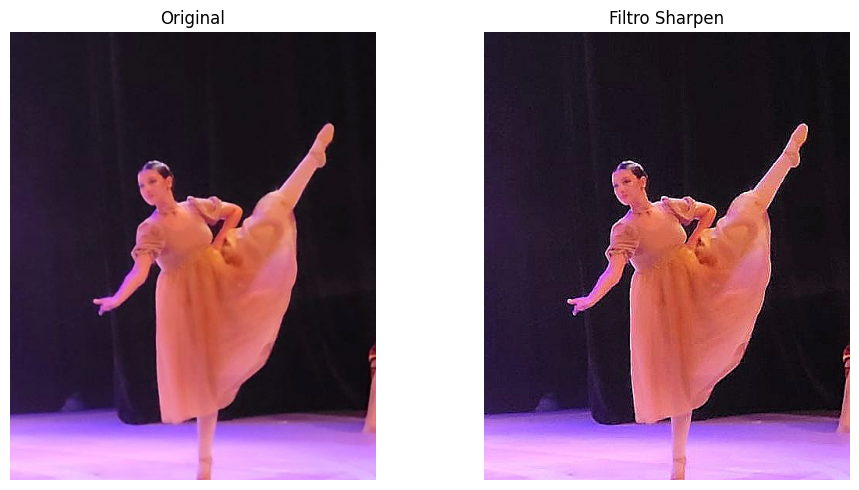

In [ ]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Função para aplicar o filtro
def apply_filter_rgb(image, kernel):
    """
    Aplica o filtro a cada canal RGB da imagem.

    :param image: np.array, imagem RGB
    :param kernel: np.array, kernel a ser aplicado
    :return: np.array, imagem filtrada
    """
    if len(image.shape) == 3:  # Verifica se é RGB
        filtered_image = np.zeros_like(image, dtype=np.float32)
        for c in range(image.shape[2]):  # Itera sobre os canais (R, G, B)
            filtered_image[:, :, c] = convolve2d(image[:, :, c], kernel, mode='same', boundary='symm')
        return np.clip(filtered_image, 0, 255).astype(np.uint8)  # Garante que os valores estão no intervalo [0, 255]
    else:
        raise ValueError("A entrada deve ser uma imagem RGB (3 canais).")

# Kernel Sharpen para melhorar a nitidez
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Exemplo de uso
# Substitua `mari` pela sua imagem RGB carregada como um numpy array
sobel_x_mari = apply_filter_rgb(img_data, sharpen_kernel)


# Função para exibir imagens lado a lado
def show_images(original, filtered, titles=["Original", "Filtro Sharpen"]):
    plt.figure(figsize=(10, 5))
    for i, img in enumerate([original, filtered]):
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrando as imagens antes e depois
show_images(img_data, sobel_x_mari)



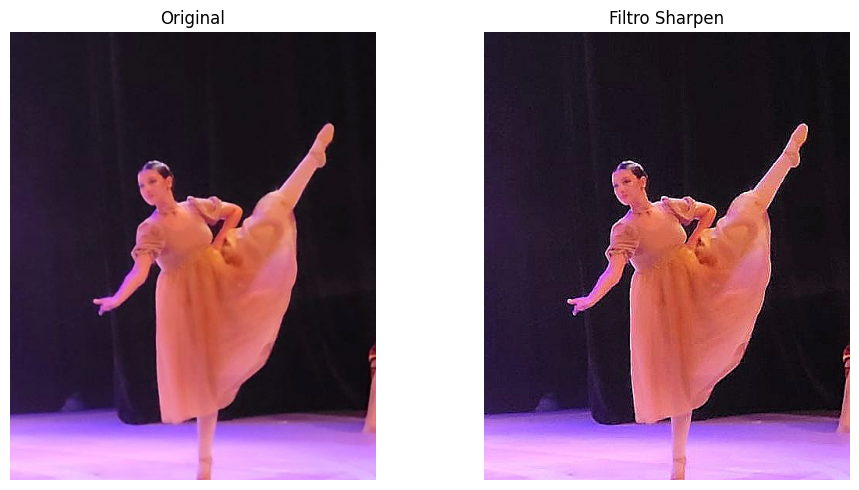

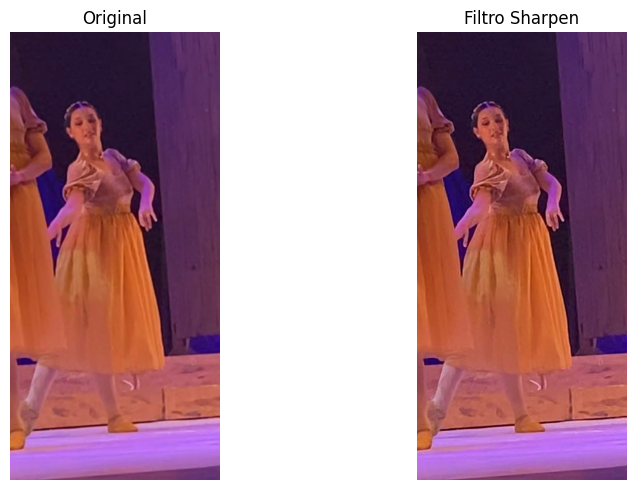

In [ ]:
# Função para aplicar o filtro sem alterar a cor
def apply_filter_rgb(image, kernel):
    """
    Aplica o filtro a cada canal RGB separadamente.
    Mantém a imagem colorida original.
    """
    if image.ndim == 3 and image.shape[2] == 3:  # Verifica se a imagem é RGB
        filtered_image = np.zeros_like(image, dtype=np.float32)
        for c in range(3):  # Aplica o filtro em cada canal (R, G, B)
            filtered_image[:, :, c] = convolve2d(
                image[:, :, c], kernel, mode='same', boundary='symm'
            )
        return np.clip(filtered_image, 0, 255).astype(np.uint8)
    else:
        raise ValueError("A imagem deve ser uma matriz RGB (3 canais).")

# Kernel para nitidez
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Substitua `mari` pela sua imagem carregada
# Exemplo de aplicação
filtered_image = apply_filter_rgb(img_data, sharpen_kernel)
filtered_image2 = apply_filter_rgb(img_data2, sharpen_kernel)


# Função para mostrar imagens
def show_images(original, filtered, titles=["Original", "Filtro Sharpen"]):
    plt.figure(figsize=(10, 5))
    for i, img in enumerate([original, filtered]):
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostra a imagem original e a filtrada
show_images(img_data, filtered_image)
show_images(img_data2, filtered_image2)

Kernel emboss (Sobel X):
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


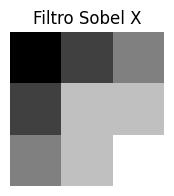

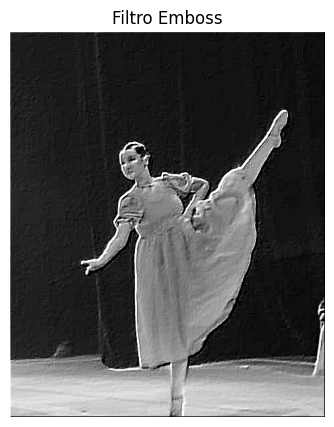

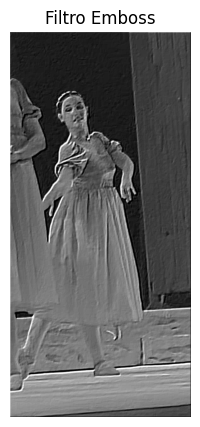

In [ ]:
#2
sobel_x_kernel = np.array([[-2, -1, 0],[ -1, 1, 1], [0, 1, 2]])

print("Kernel emboss (Sobel X):")
print(sobel_x_kernel)

sobel_x_mari = apply_filter(mari_gray, sobel_x_kernel)
sobel_x_mari2 = apply_filter(mari_gray2, sobel_x_kernel)

show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_mari, title='Filtro Emboss', figsize=(5, 5))
show_image(sobel_x_mari2, title='Filtro Emboss', figsize=(5, 5))

### Exercício 2
Escolha um dos filtros vistos aqui e aplique-o para uma imagem em RGB.

In [ ]:
sobel_x_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

print("Kernel Sharpen (Sobel X):")
print(sobel_x_kernel)

def apply_filter_rgb(image, kernel):
    filtered_image = np.zeros_like(image)
    for c in range(3):
        filtered_image[:, :, c] = apply_filter(image[:, :, c], kernel)
    return filtered_image

mari_rgb = cv2.imread('data/mari.png')
sobel_x_mari_rgb = apply_filter_rgb(mari_rgb, sobel_x_kernel)


show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_mari_rgb, title='Filtro Sharpen RGB')

Kernel Sharpen (Sobel X):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


TypeError: 'NoneType' object is not subscriptable

Kernel Emboss (Sobel X):
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


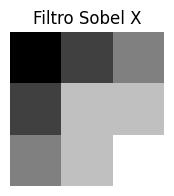

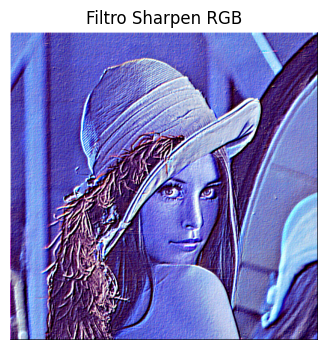

In [ ]:
sobel_x_kernel = np.array([[-2, -1, 0],[ -1, 1, 1], [0, 1, 2]])
print("Kernel Emboss (Sobel X):")
print(sobel_x_kernel)

def apply_filter_rgb(image, kernel):
    filtered_image = np.zeros_like(image)
    for c in range(3):
        filtered_image[:, :, c] = apply_filter(image[:, :, c], kernel)
    return filtered_image

lenna_rgb = cv2.imread('data/lenna.png')
sobel_x_lenna_rgb = apply_filter_rgb(lenna_rgb, sobel_x_kernel)


show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_lenna_rgb, title='Filtro Emboss RGB')